# Bayesian methodology: An lightning overview

## Quotes

Here are some representative quotes about Bayesian statistics.

The Good:
> _The subjectivist states his judgements, whereas the objectivist sweeps them under the carpet by calling assumptions knowledge, and he basks in the glorious objectivity of science._ I.J. Good

The Bad: 
> _If they [Bayesians] would only do as he [Rev. Bayes] did and publish posthumously we should all be saved a lot of trouble._ Maurice G. Kendall

The Ugly:
> _The practising Bayesian is well advised to become friends with as many numerical analysts as possible._ James O. Berger







## A divisive equation

So what's all the fuss about? Well, it comes down to interpreting one little equation called _Bayes' Rule_. To get there, consider the conditional probability of A happening given B:

$$ p(A|B) = \frac{p(A\&B)}{p(B)} $$

<img src="conditional_probability.gif">

Rearranging, we get:

$$ p(A\&B) = p(A|B)p(B) $$

By just swapping the A's and B's above, we can also get:

$$ p(A\&B) = p(B|A)p(A) $$

Which gives us $$ p(B|A) = \frac{p(A|B)p(B)}{p(A)} $$

Woah! That's incredible! To see how useful this is, let's change our A's and B's to $h$'s and $d$'s. Bayes' Rule is

$$ p(h|d) = \frac{p(d|h)p(h)}{p(d)} $$

where $h$ is a hypothesis and $d$ is some observed data. The lefthand side is the probability of a hypothesis being true given some data. That's one view of what science is. And the righthand side gives us an easier way of calculating it.

Each term in the equation has a special name:

- $ p(h|d) $ is called the _posterior_. This is what we want to know.
- $ p(d|h) $ is called the _likelihood_. This is the probability of observing some data $d$ assuming $h$ is true.
- $ p(h) $ is called the _prior_. This is the probability of hypothesis $h$ being true **before** any data is observed.
- $ p(d) $ is called the _evidence_. This is not always needed, because often we are trying to distinguish between different hypotheses, and this doesn't have anything to do with hypotheses.

The controversial nature of Bayes' Rule is in interpreting the alternative hypotheses as random (i.e. things that can have probabilities) and in the prior probability of a hypothesis being true. But enough background, let's use it!

## Obligatory coin flipping example 
### (adapted from Cam Davidson-Pilon's excellent [_Bayesian Methods for Hackers_](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers))

I give you a coin and tell you it may not be fair. That is, as opposed to a normal coin that comes up heads 50% of the time, this coin comes up heads $p$% of the time, but you have no idea what $p$ is. Let's assume you have no reason to assume any particular value of $p$. You want to know what $p$ is, so you start collecting data. You start flipping the coin and writing down whether it is H or T. **How do your beliefs (hypotheses) about the true value of $p$ change as you collect more and more data?**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from scipy import stats

np.random.seed(sum(map(ord, 'Bayes')))

In [2]:
def plot_bayesian_updating(true_p, prior_params):
    """
    Plot the distribution over possible values for p at varying levels of observed data.
    
    Parameters
    ----------
    true_p : float between 0 and 1
        The actual proportion of times the coin comes up heads
    prior_params : list(floats)
        The alpha and beta parameters of the beta distribution
    """
    n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
    # draw 500 random samples from Bernoulli distribution with param true_p
    data = stats.bernoulli.rvs(true_p, size=n_trials[-1])
    x = np.linspace(0, 1, 100) # possible values of p
    dist = stats.beta
    alpha, beta = prior_params
    
    plt.figure(figsize=(14,10))
    for k, N in enumerate(n_trials):
        ax = plt.subplot(len(n_trials)/2, 2, k+1)
        if k == 0:
            plt.xlabel("$p$, probability of heads")
        n_heads = data[:N].sum()
        n_tails = N - n_heads
        y = dist.pdf(x, alpha + n_heads, beta + n_tails)
        label = '{} tosses,\n {} heads'.format(N, n_heads)
        plt.plot(x, y, label=label)
        plt.fill_between(x, 0, y, color="#FF1A1A", alpha=0.4)
        plt.vlines(true_p, 0, 4, color="k", linestyles="--", lw=1)
        leg = plt.legend()
        leg.get_frame().set_alpha(0.4)
        plt.autoscale(tight=True)
        ax.tick_params(labelleft='off')
    
    plt.suptitle("Bayesian updating of posterior probabilities", y=1.02, fontsize=14)

    plt.tight_layout()

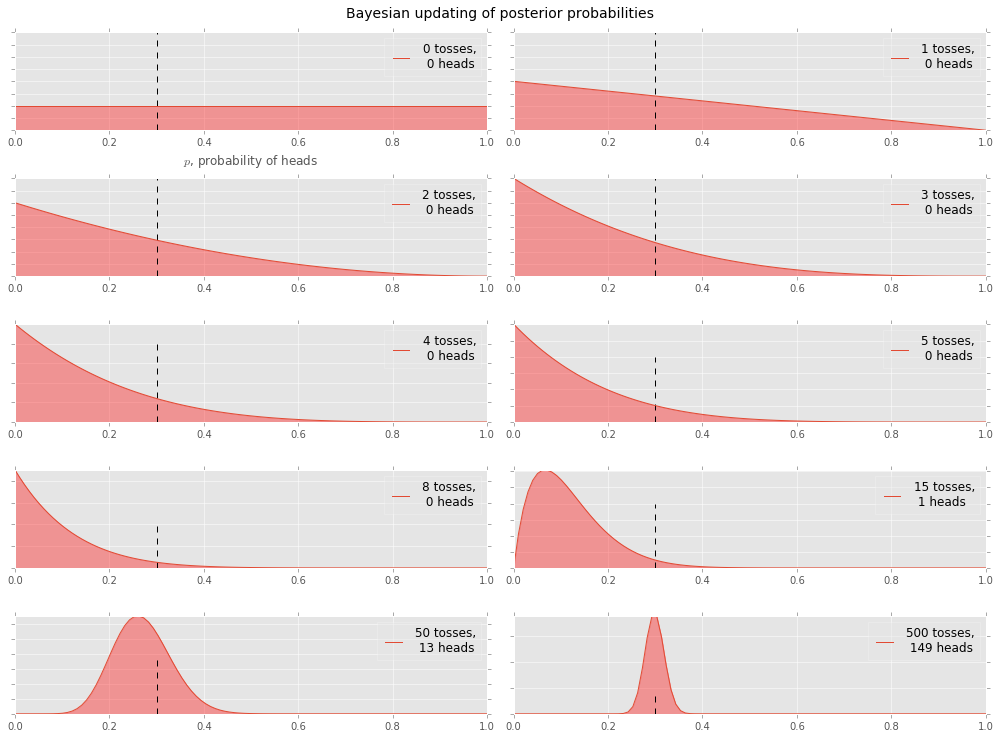

In [3]:
# If you have no idea what the true value of p is.
plot_bayesian_updating(0.30, [1, 1])

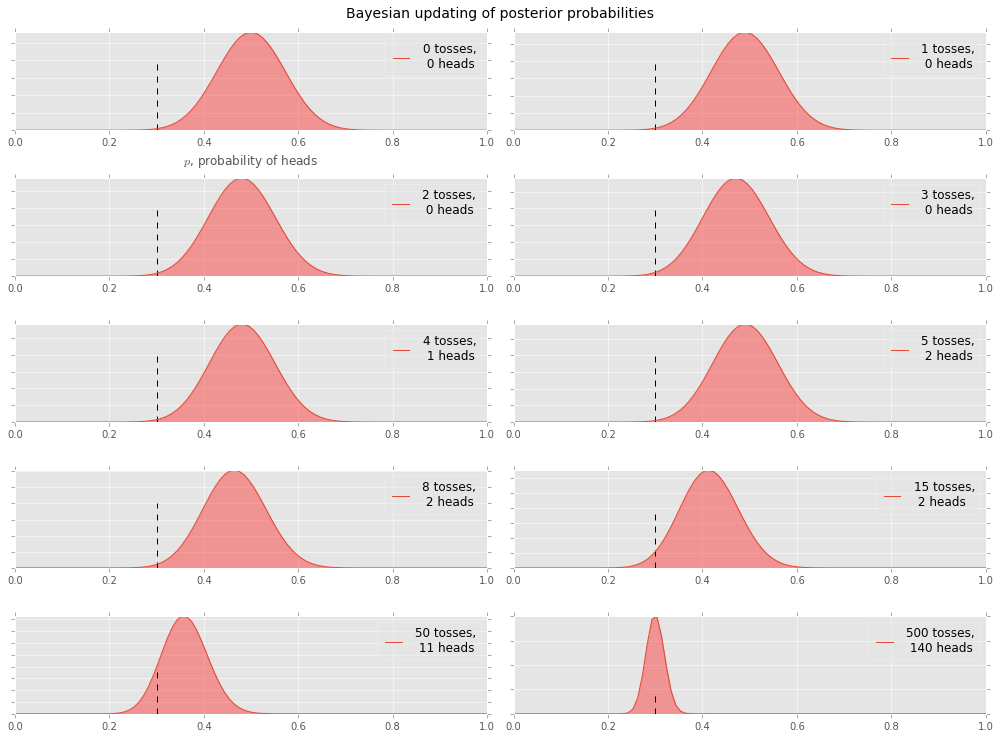

In [4]:
# No prior belief led us to the same answer as frequentist maximum likelihood.
# What if, before seeing any data, you thought I was a fair person.
plot_bayesian_updating(0.30, [25, 25])

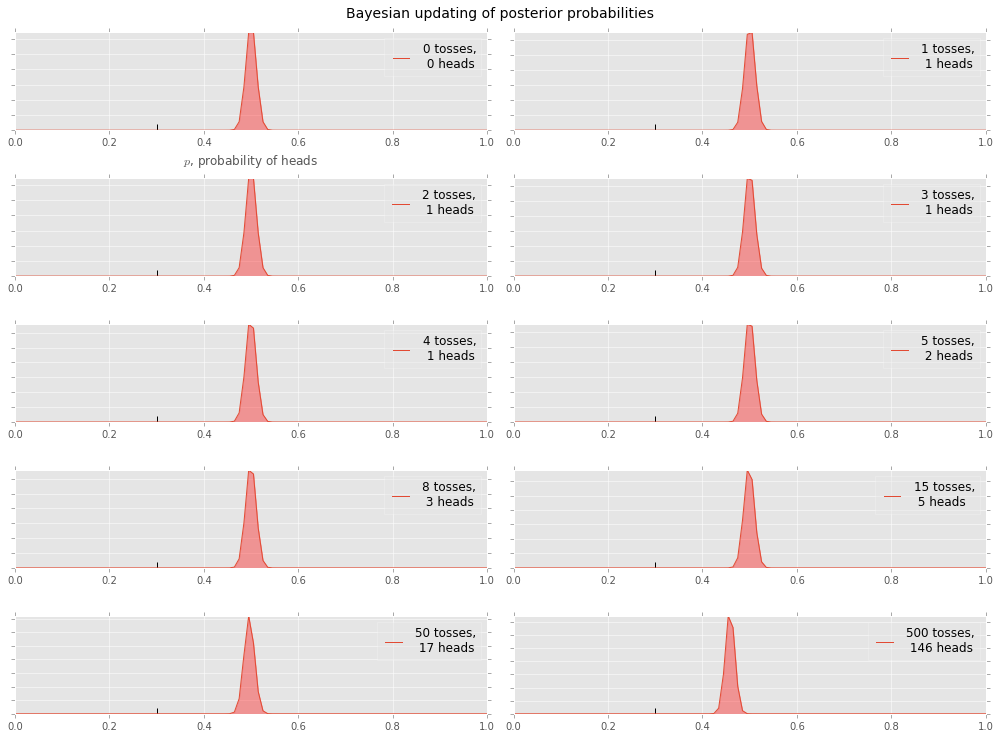

In [5]:
# What if you were adamant that I was fair.
plot_bayesian_updating(0.30, [1000, 1000])

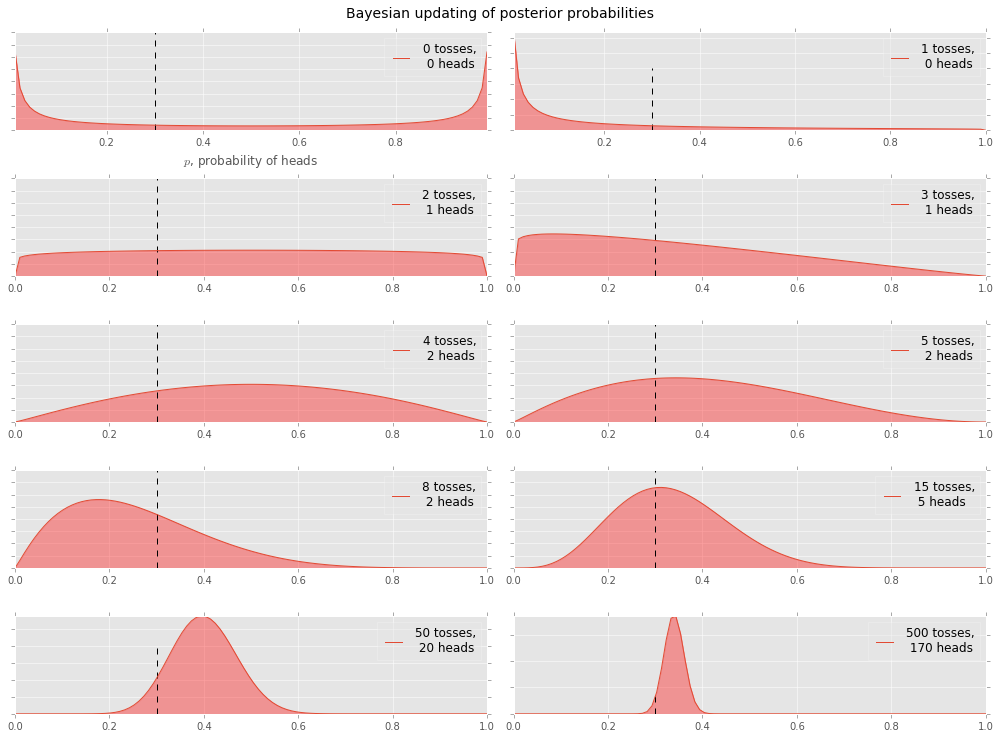

In [6]:
# I don't know what exactly what kind of coin Geoff gave me, but it's definitely not fair.
plot_bayesian_updating(0.30, [0.1, 0.1])

## Markov Chain Monte Carlo

The coin flipping example above is nice because the maths and the code are relatively manageable. There are exact answers to the equations. If we were bored on a Saturday afternoon, we could work it out by hand. But when we move to more complicated Bayesian models, the equations for the posterior distribution become impractical or even impossible to solve analytically. To overcome this, Bayesian methods approximate the posterior. How do we approximate a distribution? We sample from it. The standard algorithm for doing this approximation is called MCMC. 

See Kruschke's chapter 7 for a description of MCMC in terms of a Pacific Islander politician who before an election wants to visit each island in proportion to the number of inhabitants, without knowing how many people live on each island or even how many islands there are.

## Bayesian linear regression in Python (from PyMC3 docs)

Bayesian linear regression is just like frequentist linear regression, except that we have a prior belief of the parameter values.

This example comes from the PyMC3 docs.

We are interested in predicting outcomes $Y$ as normally-distributed observations with an expected value $\mu$ that is a linear function of two explantory variables, $X_1$ and $X_2$. Thus,

$$ Y \sim \mathcal{N(\mu, \sigma^2)} $$

$$ \mu = \alpha + \beta_1 X_1 + \beta_2 X_2$$

where $\alpha$ is the intercept, the $\beta$s are the coefficients of the $X$s and $\sigma$ is the standard deviation of the error. We want to estimate all these parameters.

In [17]:
# First, let's simulate some data. Pretend we have two explanatory variables (e.g. age and height, standardised).

np.random.seed(sum(map(ord, 'Dlab')))

# Number of data points
size = 100

# Explanatory variables
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# True parameter values
alpha_true, sigma_true = -2, 1
beta_true = [4, 2.5]

# Simulate outcome variable
Y = alpha_true + beta_true[0]*X1 + beta_true[1]*X2 + np.random.randn(size)*sigma_true

Now we need to encode our prior belief for the unknown variables in the model ($\alpha$, $\beta$s, $\sigma$). The choices we can be informed by prior experiments, subjective belief, etc. For the sake of exposition, let's choose the following:

$$ \alpha \sim \mathcal{N(0, 100)} $$
$$ \beta_i \sim \mathcal{N(-2, 64)} $$
$$ \sigma \sim |\mathcal{N(0, 1)}| $$

In [18]:
from pymc3 import Model, Normal, HalfNormal, sample, traceplot

In [19]:
linear_model = Model()

with linear_model:

    # Priors for unknown model parameters
    alpha = Normal('alpha', mu=0, sd=10) # Note in the maths above we had the variance
    beta = Normal('beta', mu=-2, sd=8, shape=2)
    sigma = HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [20]:
with linear_model:
    # draw 5000 posterior samples
    sampling_trace = sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 155.27: 100%|██████████| 200000/200000 [00:28<00:00, 6970.37it/s]
Finished [100%]: Average Loss = 155.27
100%|██████████| 5500/5500 [00:05<00:00, 1010.63it/s]


## Cool, we fitted a Bayesian linear regression model. Now what?

Today, we only have time to check the posterior distributions for the parameters. Ideally, you want to check that your model is fitting well, etc.

True alpha is -2
True betas are [4, 2.5]
True sigma is 1


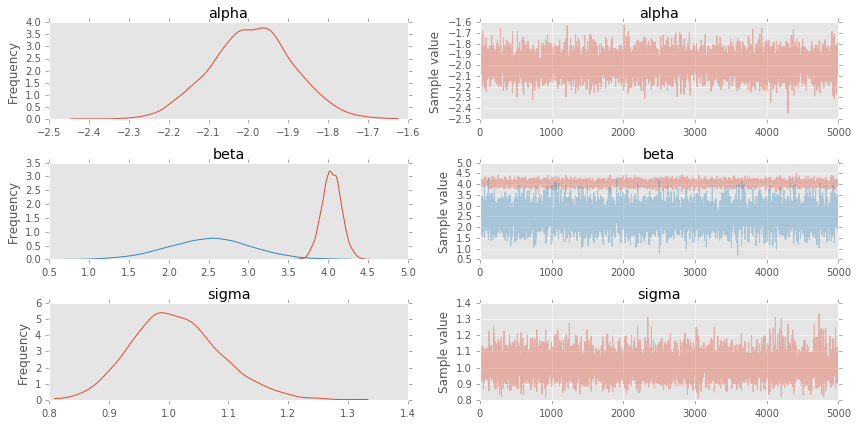

In [21]:
traceplot(sampling_trace);
print('True alpha is', alpha_true)
print('True betas are', beta_true)
print('True sigma is', sigma_true)

## Further resources

- [Bayes' theorem: The theory that would not die](http://www.mcgrayne.com/the_theory_that_would_not_die__how_bayes__rule_cracked_the_enigma_code__hunted_d_107493.htm) (Sharon Bertsch McGrayne)

_Good light reading novel about the history of Bayes' theorem._
- [Doing Bayesian data analysis a.k.a The puppy book](https://sites.google.com/site/doingbayesiandataanalysis/) (John Kruschke)

_Excellent place to start for anyone in the early stages of using statistical models. A classic textbook._
- [Bayesian methods for hackers](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers) (Cam Davidson-Pilon)

_Prefer looking at code over maths? This online book has got you covered._
- [Bayesian data analysis](http://www.stat.columbia.edu/~gelman/book/) (Gelman et al.)

_Another great textbook, at a higher level than Kruschke's._
- [Bayesian statistics made simple](https://www.youtube.com/watch?v=TpgiFIGXcT4&t=1509s) (Allen Downey, PyCon 2016)

_3 hour tutorial building up Bayesian statistics from scratch._
- [Probabilistic programming with PyMC3](https://www.youtube.com/watch?v=5TyvJ6jXHYE) (Chris Fonnesbeck)

_If you're comfortable with the theory, PyMC3 makes implementing models simple._
- [Bayesian statistical analysis in Python](https://www.youtube.com/watch?v=p1IB4zWq9C8) (Eric Ma, PyCon 2017)

_Another awesome talk._

- [Frequentism vs Bayesianism](http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/) (Jake VanderPlas)

_A series of blog posts explaining the two competing methodologies._

- [NIMBLE](https://r-nimble.org/) 

_R package for creating Bayesian models. Many of the core team are at Berkeley._

## More quotes


> _Bayesian statistics is difficult in the sense that thinking is difficult._ Donald A. Berry

> _Any approach to scientific inference which seeks to legitimize an answer in reponse to complex uncertainty is, for me, a totalitarian parody of a would-be rational learning process._ Adrian F. M. Smith